In [21]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

%matplotlib inline

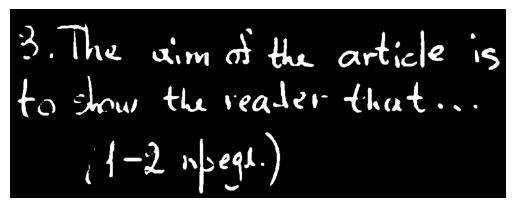

3. The aim at the article S
to show the reader that an

( 1-2 neq.)



In [84]:
test_image = 'tests/рукопис_доска.png'
img = cv2.imread(test_image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

text = pytesseract.image_to_string(
    gray,
    lang="rus+eng",
    config="--psm 3"
)

print(text)

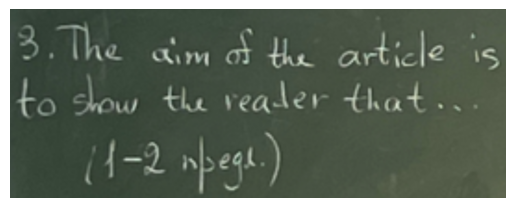

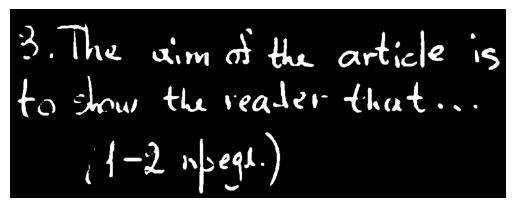

3. The aim at the article S
to show  the reader that an

( 1-2  neq.)



In [133]:
test_image = 'tests/рукопис_доска.png'
img = cv2.imread(test_image)

plt.imshow(img)
plt.axis("off")
plt.show()

def preprocess_printed(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
    gray = cv2.bilateralFilter(gray, d=7, sigmaColor=40, sigmaSpace=40)
    bg = cv2.medianBlur(gray, 31)
    norm = cv2.divide(gray, bg, scale=255)
    otsu = cv2.threshold(norm, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return otsu

def preprocess_handwritten(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return otsu

def ocr_tesseract(img, mode, lang="rus+eng"):
    if mode == "printed":
        bin_img= preprocess_printed(img)
    elif mode == "handwritten":
        bin_img = preprocess_handwritten(img)

    cfg = '--oem 3 --psm 3 -c preserve_interword_spaces=1'
    return pytesseract.image_to_string(bin_img, lang=lang, config=cfg), bin_img


# mode='printed'
mode='handwritten'

text, bin_img = ocr_tesseract(img, mode=mode)

plt.imshow(bin_img, cmap="gray")
plt.axis("off")
plt.show()

print(text)